<a href="https://colab.research.google.com/github/Efradgalio/Employee-Sentiment-Tracker/blob/main/EDA_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

# 1. Prepare Library

In [4]:
# import essential library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(color_codes=True)

from google.colab import drive

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2. Load Dataset

In [6]:
#
drive.mount('/content/drive')
# Replace 'path_to_your_file' with the actual path to your file
file_path = '/Amazon_Reviews.csv'

# Load the data
data = pd.read_csv(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset understanding

In [ ]:
# rows & columns
num_row, num_col = data.shape
print('The dataset consist of  {} rows and {} columns.'.format(num_row, num_col))

The dataset consist of  9990 rows and 14 columns.


In [ ]:
# check attributes
print('Attributes : ', data.columns.values)


Attributes :  ['Name' 'Place' 'Job_type' 'Department' 'Date' 'Overall_rating'
 'work_life_balance' 'skill_development' 'salary_and_benefits'
 'job_security' 'career_growth' 'work_satisfaction' 'Likes' 'Dislikes']


In [ ]:
data.head()

,Name,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Software Development Engineer,Hyderabad/Secunderabad,Full Time,Software Development Department,8 Aug 2023,2.0,1.0,2.0,5.0,1.0,3.0,3.0,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...
1,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,Full Time,HR Operations Department,8 Aug 2023,1.0,5.0,1.0,3.0,1.0,2.0,1.0,Good work life balance and team building exerc...,No job security. They will cut you out any-day...
2,Customer Support Associate (working remotely),NaN,Full Time,Customer Success Department,8 Aug 2023,1.0,2.0,1.0,2.0,1.0,2.0,3.0,"good about this company, provides virtual roles","this company is really bad , no job security ,..."
3,Sds Associate (working remotely),NaN,Full Time,Non Voice Department,7 Aug 2023,2.0,3.0,2.0,2.0,2.0,2.0,2.0,Leaves are there but more than policy it will ...,To be honest there are Many consumer team but ...
4,Software Developer,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,7 Aug 2023,4.0,3.0,4.0,5.0,3.0,4.0,3.0,Amazon has high standard when it comes to runn...,Management layer has lot of redundancies.


In [ ]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 9990 non-null   object 
 1   Place                7992 non-null   object 
 2   Job_type             9990 non-null   object 
 3   Department           9990 non-null   object 
 4   Date                 9990 non-null   object 
 5   Overall_rating       9990 non-null   float64
 6   work_life_balance    9990 non-null   float64
 7   skill_development    9990 non-null   float64
 8   salary_and_benefits  9990 non-null   float64
 9   job_security         9990 non-null   float64
 10  career_growth        9990 non-null   float64
 11  work_satisfaction    9990 non-null   float64
 12  Likes                9990 non-null   object 
 13  Dislikes             9990 non-null   object 
dtypes: float64(7), object(7)
memory usage: 1.1+ MB


## Check Data Duplication

In [ ]:
# Check Duplicate Data
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (9980, 14)


In [ ]:
# Check no of duplicate data
duplicate_counts = {}
for column in data.columns:
    duplicate_counts[column] = data.duplicated(subset=[column]).sum()

for column, count in duplicate_counts.items():
    print(f"Number of duplicate entries in {column}: {count}")

Number of duplicate entries in Name: 9980
Number of duplicate entries in Place: 9983
Number of duplicate entries in Job_type: 9989
Number of duplicate entries in Department: 9982
Number of duplicate entries in Date: 9985
Number of duplicate entries in Overall_rating: 9985
Number of duplicate entries in work_life_balance: 9985
Number of duplicate entries in skill_development: 9985
Number of duplicate entries in salary_and_benefits: 9986
Number of duplicate entries in job_security: 9985
Number of duplicate entries in career_growth: 9985
Number of duplicate entries in work_satisfaction: 9986
Number of duplicate entries in Likes: 9980
Number of duplicate entries in Dislikes: 9980






*   Most of attribute (column) have duplicate entry, possibly the attribute is multiple choice or linkert scale option
*   Column Like & Disklike was free text
*   Therefore, no need to handle data duplication



## Handling missing data or null

In [ ]:
print(data.isnull().sum())

Name                      0
Place                  1998
Job_type                  0
Department                0
Date                      0
Overall_rating            0
work_life_balance         0
skill_development         0
salary_and_benefits       0
job_security              0
career_growth             0
work_satisfaction         0
Likes                     0
Dislikes                  0
dtype: int64




*   Null Data found in the column Place, 1998 data was null or empty, therefore this column will be considered not to use it or dropped

# 3. Exploration Data Name, Place, Job Type, Department, Date

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

columns = ['Name', 'Place', 'Job_type', 'Department', 'Date']
colors = ['red', 'yellow', 'orange', 'green', 'blue']

fig = make_subplots(rows=3, cols=2)

for i, column in enumerate(columns):
    # Create a bar plot and add it to the subplot
    fig.add_trace(go.Bar(x=data[column].value_counts().index, y=data[column].value_counts().values, marker_color=colors[i], name=column, showlegend=False), row=i//2 + 1, col=i%2 + 1)

fig.update_layout(height=1500, width=1000, title_text="Subplots with Bar Plots")  # Update the layout
fig.show()

# 4. Exploration Data Satisfaction (Overall Satisfaction, Worklife Balance, Skill Development, Salary & Benefit, Job Security, Career Growth, and Work Satisfaction)

In [ ]:
# Statistic of Satisfaction data
columns = ['Overall_rating', 'work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']
satisfaction_desc = data[columns].describe()
print(satisfaction_desc)

       Overall_rating  work_life_balance  skill_development  \
count     9990.000000        9990.000000         9990.00000   
mean         2.400000           2.600000            2.30000   
std          1.280689           1.113609            1.34543   
min          1.000000           1.000000            1.00000   
25%          1.000000           2.000000            1.00000   
50%          2.000000           2.000000            2.00000   
75%          3.000000           3.000000            3.00000   
max          5.000000           5.000000            5.00000   

       salary_and_benefits  job_security  career_growth  work_satisfaction  
count           9990.00000   9990.000000    9990.000000        9990.000000  
mean               3.50000      2.100000       2.800000           2.300000  
std                1.20422      1.374842       1.166249           1.187494  
min                2.00000      1.000000       1.000000           1.000000  
25%                2.00000      1.000000       

In [ ]:
# Graphic of Satisfaction Data
import plotly.graph_objects as go
from plotly.subplots import make_subplots

columns = ['Overall_rating', 'work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']
colors = ['red', 'yellow', 'orange', 'green', 'blue']
fig = make_subplots(rows=4, cols=2, subplot_titles=columns)

for i, column in enumerate(columns):
    for j in range(1, 6):
        data_to_plot = data[data[column] == j]

        fig.add_trace(go.Histogram(x=data_to_plot[column], marker_color=colors[j-1], nbinsx=5, name=f'{column} {j}'), row=i//2 + 1, col=i%2 + 1)

fig.update_layout(height=1500, width=1000, title_text="Subplots with Histograms")
fig.show()



Overall Satisfaction is low as the average in 2,4 and skew positive, the contribution :
- Work life balance consider to be low to moderate as average score 2,6
- Skill development low as the average score 2,3
- Salary & Benefit consider to be moderate average score 3,5. eventhough the highest in point 5 & 2
- Job Security average score 2,1 (low) skew positif with long tail
- Career Growth average consider to be moderate
- Work satisfaction consider to be low






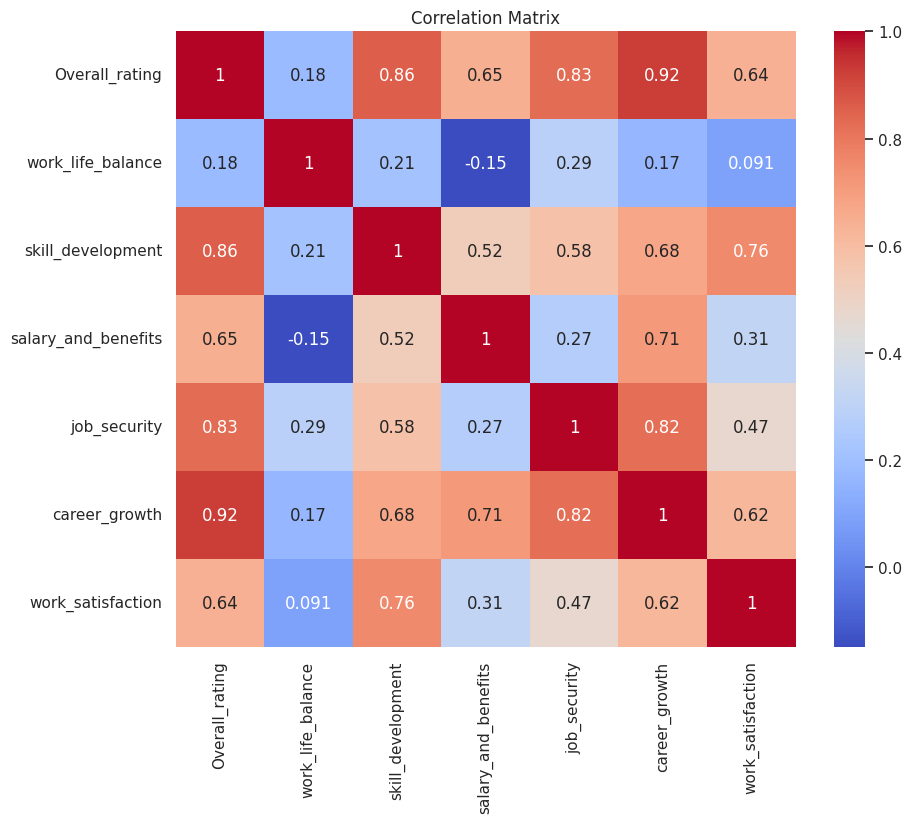

In [ ]:
# Heat map
correlation_matrix = data[['Overall_rating', 'work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Sort listed of correlation matrid
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations != 1.0]

correlations_table = sorted_correlations.reset_index()
correlations_table.columns = ['Variable 1', 'Variable 2', 'Correlation']

print(correlations_table)

             Variable 1           Variable 2  Correlation
0        Overall_rating        career_growth     0.924033
1         career_growth       Overall_rating     0.924033
2     skill_development       Overall_rating     0.859015
3        Overall_rating    skill_development     0.859015
4        Overall_rating         job_security     0.829278
5          job_security       Overall_rating     0.829278
6         career_growth         job_security     0.823329
7          job_security        career_growth     0.823329
8     work_satisfaction    skill_development     0.757420
9     skill_development    work_satisfaction     0.757420
10        career_growth  salary_and_benefits     0.712109
11  salary_and_benefits        career_growth     0.712109
12    skill_development        career_growth     0.675612
13        career_growth    skill_development     0.675612
14  salary_and_benefits       Overall_rating     0.648476
15       Overall_rating  salary_and_benefits     0.648476
16    work_sat

# 5. Exploration Data "Dislikes dan Likes"

In [ ]:
# Dislikes
from collections import Counter
dislikes = data['Dislikes']

word_freq = Counter(" ".join(dislikes).split())

# Sort the words by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)

# Print the sorted word frequencies
for word, freq in sorted_word_freq:
    print(f'Word: {word}, Frequency: {freq}')

Word: and, Frequency: 14985
Word: the, Frequency: 9990
Word: is, Frequency: 8991
Word: you, Frequency: 7992
Word: for, Frequency: 7992
Word: of, Frequency: 6993
Word: work, Frequency: 4995
Word: a, Frequency: 4995
Word: are, Frequency: 4995
Word: your, Frequency: 4995
Word: to, Frequency: 3996
Word: at, Frequency: 3996
Word: will, Frequency: 3996
Word: be, Frequency: 3996
Word: not, Frequency: 3996
Word: they, Frequency: 3996
Word: skills, Frequency: 3996
Word: trainer, Frequency: 3996
Word: have, Frequency: 2997
Word: team, Frequency: 2997
Word: so, Frequency: 2997
Word: working, Frequency: 2997
Word: job, Frequency: 2997
Word: on, Frequency: 2997
Word: this, Frequency: 2997
Word: ,, Frequency: 2997
Word: that, Frequency: 2997
Word: comm, Frequency: 2997
Word: but, Frequency: 2997
Word: performance, Frequency: 1998
Word: if, Frequency: 1998
Word: based, Frequency: 1998
Word: any, Frequency: 1998
Word: reason, Frequency: 1998
Word: even, Frequency: 1998
Word: them, Frequency: 1998
Word

In [ ]:
# Likes
likes = data['Likes']

word_freq = Counter(" ".join(likes).split())

# Sort the words by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)

# Print the sorted word frequencies
for word, freq in sorted_word_freq:
    print(f'Word: {word}, Frequency: {freq}')

Word: and, Frequency: 8991
Word: to, Frequency: 5994
Word: in, Frequency: 3996
Word: the, Frequency: 3996
Word: for, Frequency: 3996
Word: it, Frequency: 2997
Word: will, Frequency: 2997
Word: your, Frequency: 2997
Word: they, Frequency: 2997
Word: Amazon, Frequency: 2997
Word: of, Frequency: 2997
Word: with, Frequency: 2997
Word: from, Frequency: 2997
Word: support, Frequency: 2997
Word: is, Frequency: 1998
Word: great, Frequency: 1998
Word: have, Frequency: 1998
Word: Good, Frequency: 1998
Word: work, Frequency: 1998
Word: team, Frequency: 1998
Word: are, Frequency: 1998
Word: be, Frequency: 1998
Word: manager, Frequency: 1998
Word: if, Frequency: 1998
Word: a, Frequency: 1998
Word: which, Frequency: 1998
Word: them, Frequency: 1998
Word: senior, Frequency: 1998
Word: product, Frequency: 1998
Word: technical, Frequency: 1998
Word: opportunity, Frequency: 1998
Word: me, Frequency: 1998
Word: management, Frequency: 1998
Word: operations, Frequency: 1998
Word: The, Frequency: 999
Word: 

#Sentiment Analysis using textblob (just testing)

In [7]:
!pip install textblob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:

from textblob import TextBlob


dislikes = data['Dislikes']
likes = data['Likes']

data['sentiment_dislikes'] = dislikes.apply(lambda x: TextBlob(x).sentiment.polarity)
data['sentiment_likes'] = likes.apply(lambda x: TextBlob(x).sentiment.polarity)

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes,sentiment_dislikes,sentiment_likes
0,Software Development Engineer,Hyderabad/Secunderabad,Full Time,Software Development Department,8 Aug 2023,2.0,1.0,2.0,5.0,1.0,3.0,3.0,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...,-0.233333,0.900
1,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,Full Time,HR Operations Department,8 Aug 2023,1.0,5.0,1.0,3.0,1.0,2.0,1.0,Good work life balance and team building exerc...,No job security. They will cut you out any-day...,0.000000,0.700
2,Customer Support Associate (working remotely),NaN,Full Time,Customer Success Department,8 Aug 2023,1.0,2.0,1.0,2.0,1.0,2.0,3.0,"good about this company, provides virtual roles","this company is really bad , no job security ,...",-0.175000,0.700
3,Sds Associate (working remotely),NaN,Full Time,Non Voice Department,7 Aug 2023,2.0,3.0,2.0,2.0,2.0,2.0,2.0,Leaves are there but more than policy it will ...,To be honest there are Many consumer team but ...,0.220000,0.500
4,Software Developer,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,7 Aug 2023,4.0,3.0,4.0,5.0,3.0,4.0,3.0,Amazon has high standard when it comes to runn...,Management layer has lot of redundancies.,0.000000,0.242


In [9]:
!pip install gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Test check topic

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy.sparse



# Get the 'Dislikes' column
dislikes = data['Dislikes']

# Create the CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(dislikes)

# Convert to gensim
tdm = data_cv.transpose()
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# Create the gensim dictionary
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

from gensim.corpora import Dictionary

# Create a gensim dictionary from the existing dictionary
id2word_gensim = Dictionary.from_corpus(corpus, id2word=id2word)

# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)

# Print the topics
lda.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.042*"skills" + 0.042*"trainer" + 0.032*"job" + 0.032*"security" + 0.032*"won" + 0.032*"comm" + 0.032*"company" + 0.021*"level" + 0.021*"time" + 0.021*"management"'),
 (1,
  '0.057*"work" + 0.035*"team" + 0.034*"amazon" + 0.034*"working" + 0.023*"safety" + 0.023*"worst" + 0.023*"reason" + 0.023*"rs" + 0.023*"non" + 0.023*"leadership"')]

In [1]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.9 MB/s eta 0:00:00


In [15]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
vis = gensimvis.prepare(lda, corpus, id2word_gensim)

# Display the visualization
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the 'Dislikes' column
likes = data['Likes']

# Create the CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(likes)

# Convert to gensim
tdm = data_cv.transpose()
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# Create the gensim dictionary
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)

# Print the topics
lda.print_topics()

[(0,
  '0.049*"associates" + 0.049*"people" + 0.026*"opportunity" + 0.026*"business" + 0.024*"technical" + 0.024*"good" + 0.024*"operations" + 0.024*"objective" + 0.024*"growth" + 0.024*"local"'),
 (1,
  '0.056*"support" + 0.042*"amazon" + 0.042*"good" + 0.028*"product" + 0.028*"senior" + 0.028*"managers" + 0.028*"management" + 0.028*"company" + 0.028*"work" + 0.028*"team"')]

In [ ]:
def get_topic(text):
    bow = id2word.doc2bow(text.split())
    topic = max(lda[bow], key=lambda x: x[1])[0]
    return topic

# Apply the function to the 'Dislikes' column
data['topic'] = data['Dislikes'].apply(get_topic)

# Print the DataFrame with the new 'topic' column
data.head()


,Name,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes,sentiment_dislikes,sentiment_likes,topic
0,Software Development Engineer,Hyderabad/Secunderabad,Full Time,Software Development Department,8 Aug 2023,2.0,1.0,2.0,5.0,1.0,3.0,3.0,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...,-0.233333,0.900,0
1,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,Full Time,HR Operations Department,8 Aug 2023,1.0,5.0,1.0,3.0,1.0,2.0,1.0,Good work life balance and team building exerc...,No job security. They will cut you out any-day...,0.000000,0.700,0
2,Customer Support Associate (working remotely),NaN,Full Time,Customer Success Department,8 Aug 2023,1.0,2.0,1.0,2.0,1.0,2.0,3.0,"good about this company, provides virtual roles","this company is really bad , no job security ,...",-0.175000,0.700,0
3,Sds Associate (working remotely),NaN,Full Time,Non Voice Department,7 Aug 2023,2.0,3.0,2.0,2.0,2.0,2.0,2.0,Leaves are there but more than policy it will ...,To be honest there are Many consumer team but ...,0.220000,0.500,0
4,Software Developer,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,7 Aug 2023,4.0,3.0,4.0,5.0,3.0,4.0,3.0,Amazon has high standard when it comes to runn...,Management layer has lot of redundancies.,0.000000,0.242,1
